# Rad Viz experiments
This notebook will have some experiments with RadViz to find good separator features on the dataset using this visualization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load the cleaned data
user_data_df = pd.read_csv('./user_data_cleaned.csv', index_col=0)

# split the dataset to make sure we don't peek into test data
train = user_data_df[
    (user_data_df['airing_start_date'] >= '2014-01-01') & (user_data_df['airing_start_date'] < '2017-01-01')
]

# Simple features
The idea is to use rad viz to see how the instances get distributed regarding simple features, having as simple those that do not need much processing or than don't explode into a myriad of possibilities like genres, vas, licensors, etc.

<IPython.core.display.Javascript object>


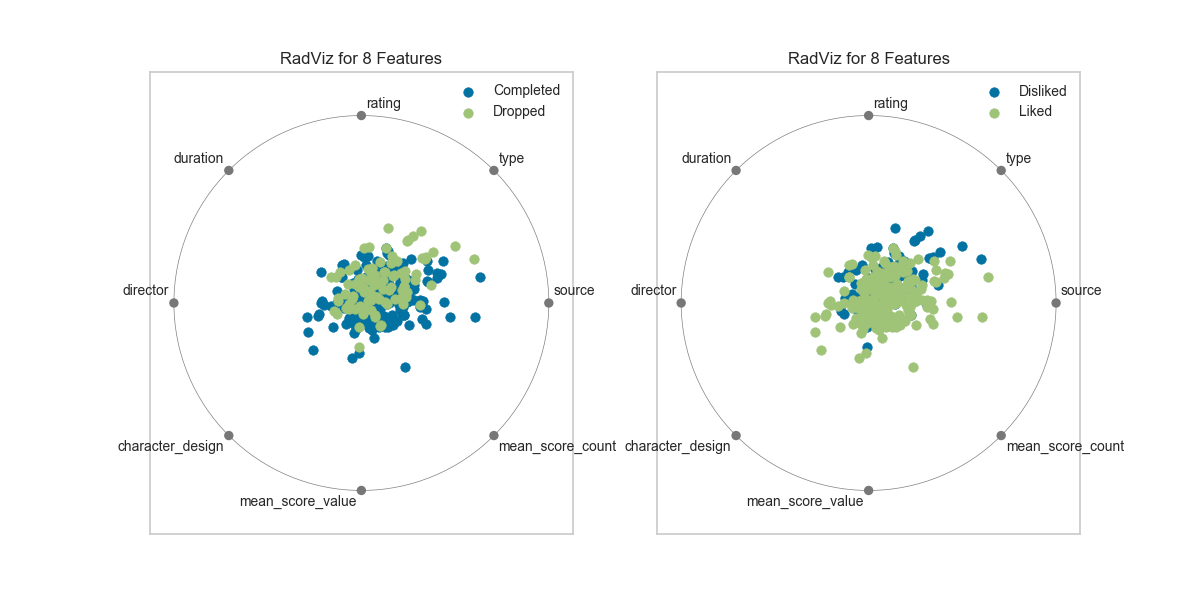

In [4]:
from sklearn.preprocessing import LabelEncoder, binarize
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt
%matplotlib notebook

# prepare a bigger ax for the visualization
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# label encoding
rad_viz_df = train.copy()
label_encoder = LabelEncoder()
rad_viz_df['source'] = label_encoder.fit_transform(train.source.fillna(''))
rad_viz_df['type'] = label_encoder.fit_transform(train.type.fillna(''))
rad_viz_df['rating'] = label_encoder.fit_transform(train.rating.fillna(''))
rad_viz_df['director'] = label_encoder.fit_transform(train.director.fillna(''))
rad_viz_df['character_design'] = label_encoder.fit_transform(train.character_design.fillna(''))
rad_viz_df['user_status'] = label_encoder.fit_transform(train.user_status)

# binarize the score to use as a different classification target
rad_viz_df['liked'] = binarize(train.score.values.reshape(-1, 1), 4)

# Specify the features of interest and the classes of the target
features = [
    'source', 'type', 'rating', 'duration', 'director', 'character_design', 'mean_score_value',
    'mean_score_count'
]
classes1 = label_encoder.classes_
classes2 = ['Disliked', 'Liked']

# Extract the numpy arrays from the data frame
X = rad_viz_df[features].values
y1 = rad_viz_df.user_status.values
y2 = rad_viz_df.liked.values

# Instantiate the visualizer
visualizer1 = RadViz(classes=classes1, features=features, ax=ax1)
visualizer2 = RadViz(classes=classes2, features=features, ax=ax2)

visualizer1.fit(X, y1)
visualizer1.transform(X)
visualizer2.fit(X, y2)
visualizer2.transform(X)

visualizer1.poof()
visualizer2.poof()

# Genres
Genres need some more work: we use a multi label binarized to apply one hot encode on the list of genres for each instance.

<IPython.core.display.Javascript object>


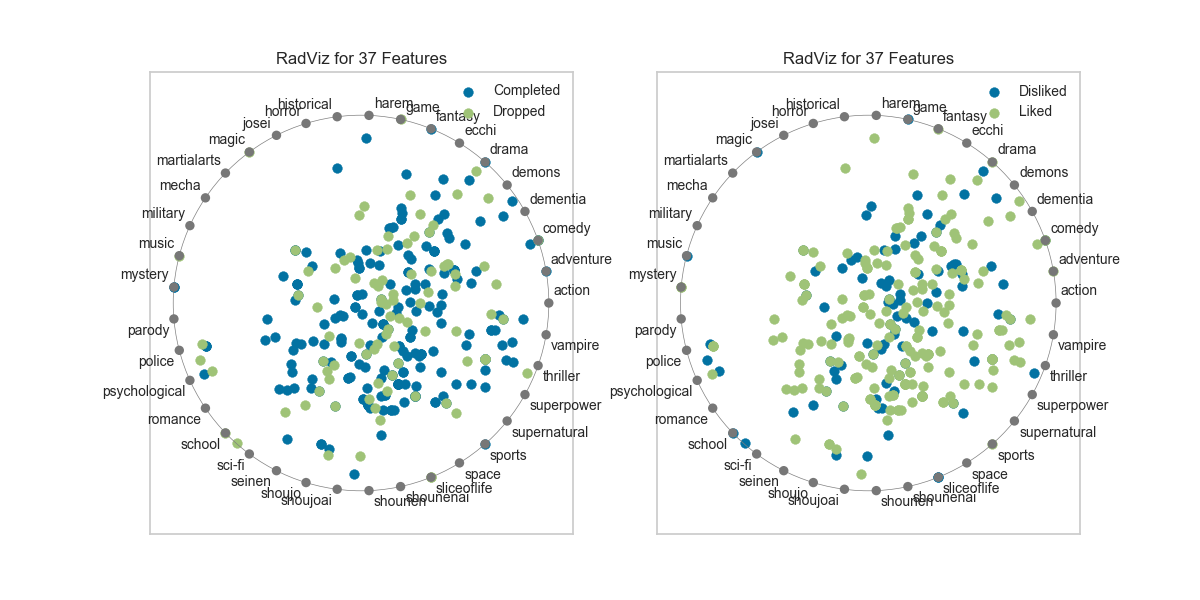

In [3]:
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, binarize
from yellowbrick.features import RadViz
import matplotlib.pyplot as plt
%matplotlib notebook

# prepare a bigger ax for the visualization
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# label encoding
rad_viz_df = train.copy()
label_encoder = LabelEncoder()
rad_viz_df['user_status'] = label_encoder.fit_transform(train.user_status)

# binarize the score to use as a different classification target
rad_viz_df['liked'] = binarize(train.score.values.reshape(-1, 1), 4)

# multilabel binarizing
multilabel_binarizer = MultiLabelBinarizer()
genres = multilabel_binarizer.fit_transform(
    train.genres.apply(lambda genres: genres.split(',') if type(genres) is str else [])
)

# Specify the features of interest and the classes of the target
features = multilabel_binarizer.classes_.tolist()

for i, genre in enumerate(features):
    rad_viz_df[genre] = genres[:, i]

classes1 = label_encoder.classes_
classes2 = ['Disliked', 'Liked']

# Extract the numpy arrays from the data frame
X = rad_viz_df[features].values
y1 = rad_viz_df.user_status.values
y2 = rad_viz_df.liked.values

# Instantiate the visualizer
visualizer1 = RadViz(classes=classes1, features=features, ax=ax1)
visualizer2 = RadViz(classes=classes2, features=features, ax=ax2)

visualizer1.fit(X, y1)
visualizer1.transform(X)
visualizer2.fit(X, y2)
visualizer2.transform(X)

visualizer1.poof()
visualizer2.poof()